In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

import warnings
warnings.filterwarnings(action="ignore")

In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
data = fetch_california_housing()

In [9]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [10]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
data.target_names

['MedHouseVal']

In [13]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [15]:
df[:2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [16]:
df["MedHouseVal"] = data.target

In [17]:
df[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [20]:
X = df.drop(["MedHouseVal"],axis = 1)

In [21]:
y = df["MedHouseVal"]

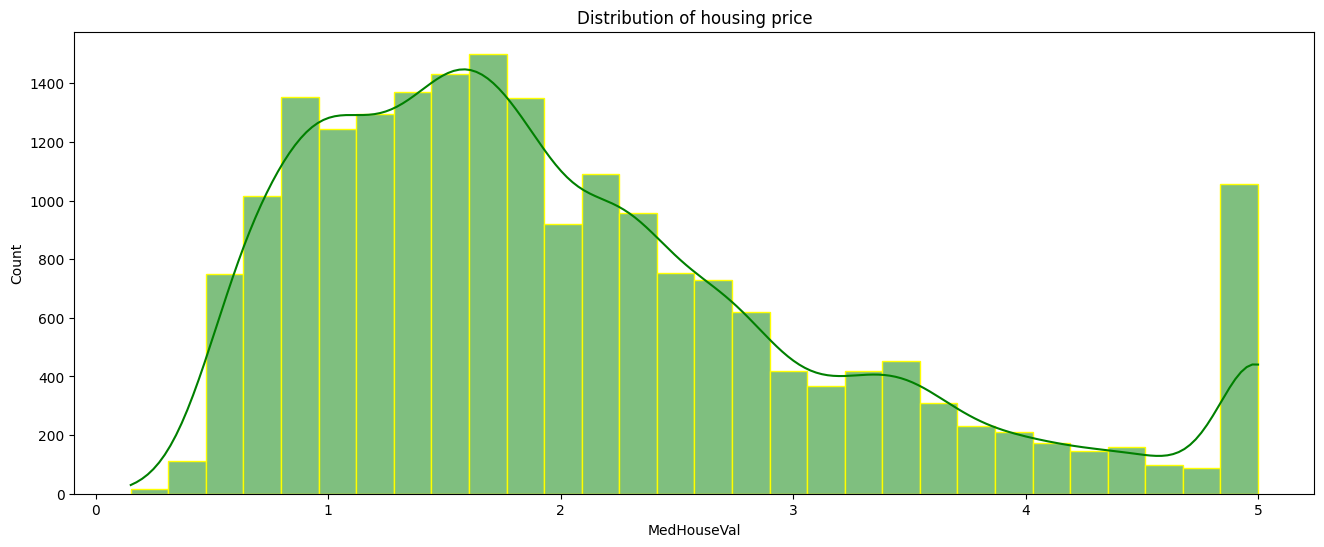

In [22]:
plt.figure(figsize=(16,6))
sns.histplot(bins = 30, x = df["MedHouseVal"], kde = True, color ="green", edgecolor = "yellow")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.title("Distribution of housing price")
plt.show()

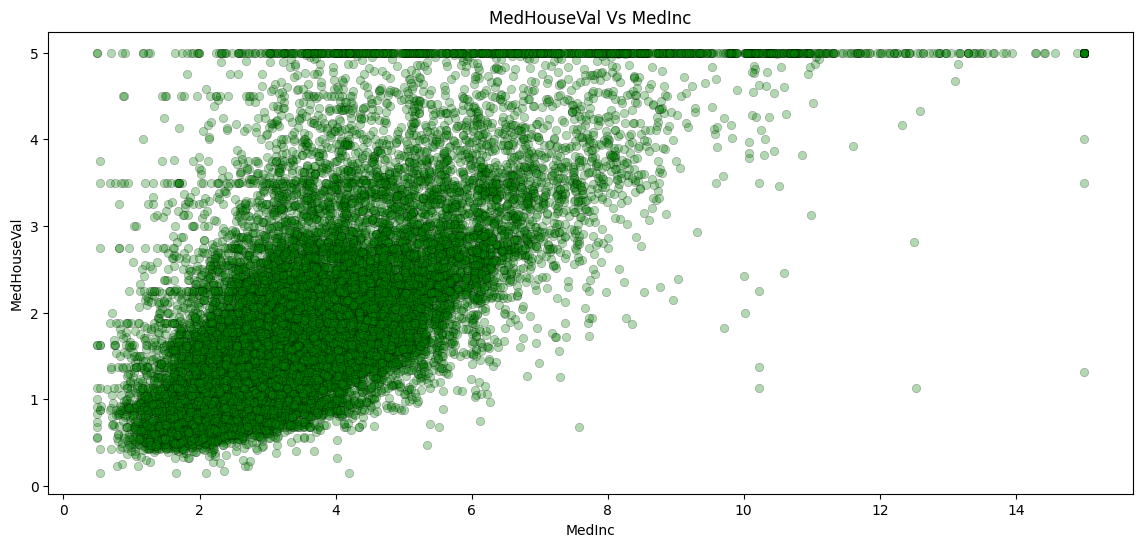

In [23]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = df["MedInc"],y=df["MedHouseVal"], color ="green",alpha=0.3, edgecolor = "black")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.title("MedHouseVal Vs MedInc")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 42)

## Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
#X_scaled = scaler.fit_transform(X_train)

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
model.score(X_train_scaled, y_train)

0.6125511913966952

In [34]:
model.score(X_test_scaled, y_test)

0.5757877060324508

In [35]:
y_pred = model.predict(X_test_scaled)

## Evaluation matric

In [36]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error, root_mean_squared_error

In [37]:
round(r2_score(y_test, y_pred),2)

0.58

In [38]:
round(mean_absolute_error(y_test, y_pred),2)

0.53

In [39]:
round(mean_squared_error(y_test, y_pred),2)

0.56

In [40]:
round(root_mean_squared_error(y_test, y_pred),2)

0.75

## Ridge and Lasso

In [41]:
from sklearn.linear_model import Ridge, Lasso

In [42]:
ridge = Ridge(alpha=0.1)

In [43]:
ridge

Ridge(alpha=0.1)

In [44]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [45]:
ridge.score(X_train_scaled, y_train)

0.6125511907003128

In [46]:
ridge.score(X_test_scaled, y_test)

0.5757905180002315

In [47]:
y_pred_R = ridge.predict(X_test_scaled)

## Evaluation

In [48]:
round(r2_score(y_test, y_pred_R),2)

0.58

In [49]:
round(mean_absolute_error(y_test, y_pred_R),2)

0.53

In [50]:
round(mean_squared_error(y_test, y_pred_R),2)

0.56

In [51]:
round(root_mean_squared_error(y_test, y_pred_R),2)

0.75

## Lasso

In [52]:
lasso = Lasso(alpha=0.1)

In [53]:
lasso

Lasso(alpha=0.1)

In [54]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [55]:
lasso.score(X_train_scaled, y_train)

0.4974185516409556

In [56]:
lasso.score(X_test_scaled, y_test)

0.48136113250290735

In [57]:
y_pred_L = ridge.predict(X_test_scaled)

## Evaluation

In [58]:
round(r2_score(y_test, y_pred_L),2)

0.58

In [59]:
round(mean_absolute_error(y_test, y_pred_L),2)

0.53

In [60]:
round(mean_squared_error(y_test, y_pred_L),2)

0.56

In [61]:
round(root_mean_squared_error(y_test, y_pred_L),2)

0.75

---

In [62]:
# Step 1. Simple Q&A corpus (list of tuples)

qa_corpus = [
    ("What is the California housing dataset?",
     "It is a dataset containing information about California districts such as median income, house age, and median house value."),

    ("Which regression models are used in this project?",
     "We used Linear Regression, Ridge Regression, and Lasso Regression models."),

    ("What is Linear Regression?",
     "Linear Regression models the relationship between dependent and independent variables using a straight line."),

    ("What is Ridge Regression?",
     "Ridge Regression is a regularized linear model that helps prevent overfitting by adding an L2 penalty."),

    ("What is Lasso Regression?",
     "Lasso Regression is similar to Ridge but uses an L1 penalty, which can shrink some coefficients to zero."),

    ("How can I predict house prices?",
     "You can use the trained regression model's predict() function with preprocessed feature values."),

    ("How can I evaluate model performance?",
     "You can evaluate models using metrics like R-squared, Mean Squared Error, or Root Mean Squared Error."),

    ("Which library is used for the chatbot?",
     "This chatbot is built using the NLTK library for natural language processing."),

    ("How can I save my model?",
     "Models can be saved using joblib.dump() or pickle.dump() for later use."),

    ("Who developed this chatbot?",
     "This chatbot was developed as part of the California Housing Regression project.")
]


---

In [66]:
import joblib

In [67]:
joblib.dump(model, "linear_model.pkl")

['linear_model.pkl']

In [68]:
joblib.dump(ridge, "ridge_model.pkl")

['ridge_model.pkl']

In [69]:
joblib.dump(lasso, "lasso_model.pkl")

['lasso_model.pkl']

In [70]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [74]:
joblib.dump(qa_corpus, "corpus.pkl")

['corpus.pkl']

---